# IMDB Movie Reviews Analysis
## Vanilla RNN and LSTM Models

In [1]:
import os

from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Data Extraction
IMDB movie review dataset : Downloaded from https://ai.stanford.edu/~amaas/data/sentiment/ \
Data is extracted from text files in 'aclImdb' folder and labels are assigned accordingly

In [2]:
def extract_txt_labels(path):
    labels = []
    texts = []

    for label_type in ['neg', 'pos']:
        direc = os.path.join(path, label_type)
        for fname in os.listdir(direc):
            if fname [-4:] == '.txt':
                f = open(os.path.join(direc, fname), encoding='utf-8')
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)
    return texts, labels

In [3]:
train_path = 'aclImdb/train'
test_path = 'aclImdb/test'

train_txt, train_labels = extract_txt_labels(train_path)
test_txt, test_labels = extract_txt_labels(test_path)

### Tokenize data

In [4]:
max_len = 200
max_words = 10000

In [5]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train_txt)
train_sequences = tokenizer.texts_to_sequences(train_txt)

word_index = tokenizer.word_index
len(word_index)

test_sequences = tokenizer.texts_to_sequences(test_txt)

### Pad input sequences

In [6]:
X_train = keras.preprocessing.sequence.pad_sequences(train_sequences, max_len)
X_test = keras.preprocessing.sequence.pad_sequences(test_sequences, max_len)

Y_train = np.array(train_labels)
Y_test = np.array(test_labels)

In [7]:
print('Shape of processed dataset: ')
print('Train dataset :',X_train.shape)
print('Train labels : ',Y_train.shape)
print('Test dataset :',X_test.shape)
print('Test labels : ',Y_test.shape)

Shape of processed dataset: 
Train dataset : (25000, 200)
Train labels :  (25000,)
Test dataset : (25000, 200)
Test labels :  (25000,)


#### Glove vectors for embedding
Glove vectors downloaded from https://nlp.stanford.edu/projects/glove \
100 dimensional vector is used

In [8]:
embedded_words = {}
with open('glove.6B.100d.txt') as file:
    for line in file:
        words, coeff = line.split(maxsplit=1)
        coeff = np.array(coeff.split(),dtype = float)
        embedded_words[words] = coeff

embedding_matrix = np.zeros((len(word_index)+1, 100))
for word, i in word_index.items():
    embedding_vector = embedded_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [9]:
print('Shape of embedding matrix:',embedding_matrix.shape)

Shape of embedding matrix: (88583, 100)


# Functions

##### Functions to plot accuracy and loss vs epochs of models

In [169]:
def plot_acc(hist):
    fig = plt.figure()
    plt.suptitle('Accuracy vs epochs')
    plt.plot(hist.history['accuracy'], label='Trianing accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
    plt.legend()

def plot_loss(hist):
    fig = plt.figure()
    plt.suptitle('Loss vs epochs')
    plt.plot(hist.history['loss'], label='Trianing loss')
    plt.plot(hist.history['val_loss'], label='Validation loss')
    plt.legend()

### Models - Vanilla RNN and LSTM

##### Function to create Vanilla RNN models, which takes input argument as hidden state dimension

In [11]:
def vanilla_rnn(hidden_state_dim):
    vanilla_model = keras.Sequential([
        keras.layers.Embedding(len(word_index)+1, 100, weights=[embedding_matrix], input_length=max_len, trainable=False),
        keras.layers.SimpleRNN(hidden_state_dim, return_sequences=True),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(1, activation='sigmoid'),
    ])
    vanilla_model.summary()
    opt = keras.optimizers.Adam(lr=0.0001, beta_1 = 0.6)
    vanilla_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return vanilla_model

##### Function to create LSTM models, which takes input argument as hidden state dimension

In [12]:
def lstm_model(hidden_state_dim):
    model = keras.Sequential([
        keras.layers.Embedding(len(word_index)+1, 100, weights=[embedding_matrix], input_length=max_len,trainable=False),
        keras.layers.LSTM(hidden_state_dim, return_sequences = True),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dropout(0.05),
        keras.layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# Models - Vanilla RNN
##### With hidden state dimensions 20, 50, 100, 200, 500

## Vanilla RNN 20

In [13]:
vanilla_20_model = vanilla_rnn(20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          8858300   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 200, 20)           2420      
_________________________________________________________________
global_average_pooling1d (Gl (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,860,741
Trainable params: 2,441
Non-trainable params: 8,858,300
_________________________________________________________________


In [14]:
vanilla_20_history = vanilla_20_model.fit(X_train, Y_train, epochs=10, validation_data =(X_test, Y_test))

Epoch 1/10
782/782 [==============================] - 26s 33ms/step - loss: 0.6854 - accuracy: 0.5699 - val_loss: 0.6649 - val_accuracy: 0.6542
Epoch 2/10
782/782 [==============================] - 22s 29ms/step - loss: 0.6284 - accuracy: 0.6717 - val_loss: 0.5992 - val_accuracy: 0.6928
Epoch 3/10
782/782 [==============================] - 22s 28ms/step - loss: 0.5707 - accuracy: 0.7194 - val_loss: 0.5626 - val_accuracy: 0.7182
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.5477 - accuracy: 0.7350 - val_loss: 0.5449 - val_accuracy: 0.7377
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.5379 - accuracy: 0.7389 - val_loss: 0.5382 - val_accuracy: 0.7402
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 0.5273 - accuracy: 0.7488 - val_loss: 0.5293 - val_accuracy: 0.7450
Epoch 7/10
782/782 [==============================] - 21s 27ms/step - loss: 0.5219 - accuracy: 0.7514 - val_loss: 0.5241 - val_accuracy:

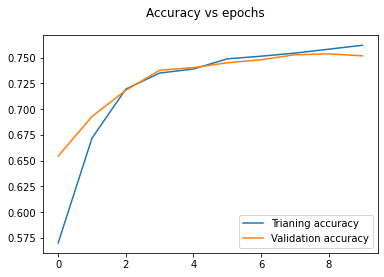

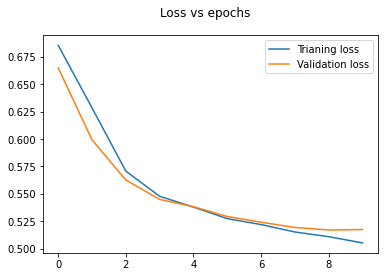

In [160]:
plot_acc(vanilla_20_history)
plot_loss(vanilla_20_history)

In [16]:
vanilla_20_test_loss, vanilla_20_test_acc = vanilla_20_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(vanilla_20_test_acc*100))

782/782 [==============================] - 5s 6ms/step - loss: 0.5174 - accuracy: 0.7517
Test accuracy: 75.17%


## Vanilla RNN 50

In [17]:
vanilla_50_model = vanilla_rnn(50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          8858300   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 200, 50)           7550      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 8,865,901
Trainable params: 7,601
Non-trainable params: 8,858,300
_________________________________________________________________


In [18]:
vanilla_50_history = vanilla_50_model.fit(X_train, Y_train, epochs=10, validation_data =(X_test, Y_test))

Epoch 1/10
782/782 [==============================] - 24s 30ms/step - loss: 0.6365 - accuracy: 0.6506 - val_loss: 0.5677 - val_accuracy: 0.7140
Epoch 2/10
782/782 [==============================] - 23s 29ms/step - loss: 0.5456 - accuracy: 0.7350 - val_loss: 0.5441 - val_accuracy: 0.7353
Epoch 3/10
782/782 [==============================] - 22s 29ms/step - loss: 0.5230 - accuracy: 0.7508 - val_loss: 0.5612 - val_accuracy: 0.7239
Epoch 4/10
782/782 [==============================] - 23s 30ms/step - loss: 0.5096 - accuracy: 0.7588 - val_loss: 0.5097 - val_accuracy: 0.7616
Epoch 5/10
782/782 [==============================] - 22s 29ms/step - loss: 0.5015 - accuracy: 0.7651 - val_loss: 0.4992 - val_accuracy: 0.7647
Epoch 6/10
782/782 [==============================] - 22s 29ms/step - loss: 0.4940 - accuracy: 0.7702 - val_loss: 0.5162 - val_accuracy: 0.7550
Epoch 7/10
782/782 [==============================] - 22s 29ms/step - loss: 0.4877 - accuracy: 0.7740 - val_loss: 0.4889 - val_accuracy:

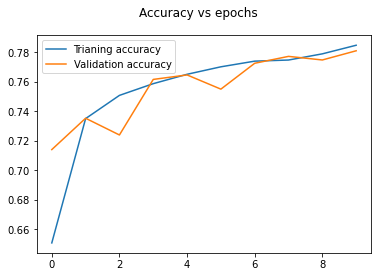

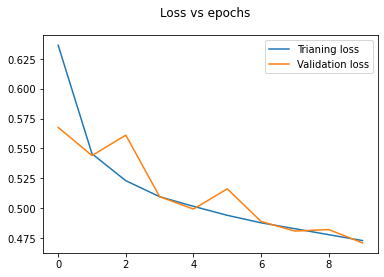

In [162]:
plot_acc(vanilla_50_history)
plot_loss(vanilla_50_history)

In [20]:
vanilla_50_test_loss, vanilla_50_test_acc = vanilla_50_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(vanilla_50_test_acc*100))

782/782 [==============================] - 5s 6ms/step - loss: 0.4709 - accuracy: 0.7811
Test accuracy: 78.11%


## Vanilla RNN 100

In [86]:
vanilla_100_model = vanilla_rnn(100)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 200, 100)          8858300   
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 200, 100)          20100     
_________________________________________________________________
global_average_pooling1d_18  (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 8,878,501
Trainable params: 20,201
Non-trainable params: 8,858,300
_________________________________________________________________


In [87]:
vanilla_100_history = vanilla_100_model.fit(X_train, Y_train, epochs=10, validation_data =(X_test, Y_test), batch_size=64)

Epoch 1/10
391/391 [==============================] - 15s 39ms/step - loss: 0.6400 - accuracy: 0.6328 - val_loss: 0.5872 - val_accuracy: 0.6956
Epoch 2/10
391/391 [==============================] - 15s 39ms/step - loss: 0.5482 - accuracy: 0.7335 - val_loss: 0.5468 - val_accuracy: 0.7307
Epoch 3/10
391/391 [==============================] - 16s 41ms/step - loss: 0.5194 - accuracy: 0.7532 - val_loss: 0.5437 - val_accuracy: 0.7283
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 0.5099 - accuracy: 0.7595 - val_loss: 0.5076 - val_accuracy: 0.7663
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.4978 - accuracy: 0.7676 - val_loss: 0.4998 - val_accuracy: 0.7634
Epoch 6/10
391/391 [==============================] - 15s 38ms/step - loss: 0.4900 - accuracy: 0.7736 - val_loss: 0.4985 - val_accuracy: 0.7628
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.4832 - accuracy: 0.7759 - val_loss: 0.4799 - val_accuracy:

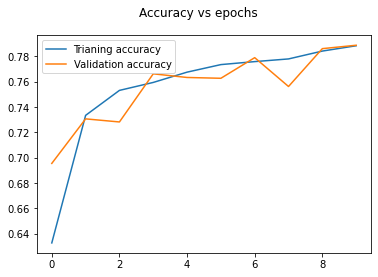

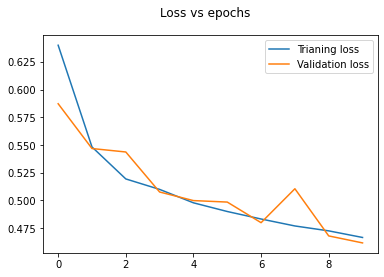

In [164]:
plot_acc(vanilla_100_history)
plot_loss(vanilla_100_history)

In [89]:
vanilla_100_test_loss, vanilla_100_test_acc = vanilla_100_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(vanilla_100_test_acc*100))

782/782 [==============================] - 5s 7ms/step - loss: 0.4616 - accuracy: 0.7888
Test accuracy: 78.88%


## Vanilla RNN 200

In [155]:
vanilla_200_model = vanilla_rnn(200)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 200, 100)          8858300   
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (None, 200, 200)          60200     
_________________________________________________________________
global_average_pooling1d_32  (None, 200)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 201       
Total params: 8,918,701
Trainable params: 60,401
Non-trainable params: 8,858,300
_________________________________________________________________


In [156]:
vanilla_200_history = vanilla_200_model.fit(X_train, Y_train, epochs=10, validation_data =(X_test, Y_test), batch_size=80)

Epoch 1/10
313/313 [==============================] - 40s 126ms/step - loss: 0.6132 - accuracy: 0.6610 - val_loss: 0.5535 - val_accuracy: 0.7286
Epoch 2/10
313/313 [==============================] - 39s 125ms/step - loss: 0.5323 - accuracy: 0.7434 - val_loss: 0.6172 - val_accuracy: 0.6896
Epoch 3/10
313/313 [==============================] - 39s 125ms/step - loss: 0.5142 - accuracy: 0.7600 - val_loss: 0.5018 - val_accuracy: 0.7643
Epoch 4/10
313/313 [==============================] - 39s 126ms/step - loss: 0.4999 - accuracy: 0.7618 - val_loss: 0.4931 - val_accuracy: 0.7735
Epoch 5/10
313/313 [==============================] - 40s 127ms/step - loss: 0.4809 - accuracy: 0.7776 - val_loss: 0.4882 - val_accuracy: 0.7700
Epoch 6/10
313/313 [==============================] - 40s 127ms/step - loss: 0.4697 - accuracy: 0.7843 - val_loss: 0.4623 - val_accuracy: 0.7861
Epoch 7/10
313/313 [==============================] - 40s 127ms/step - loss: 0.4573 - accuracy: 0.7928 - val_loss: 0.4689 - val_ac

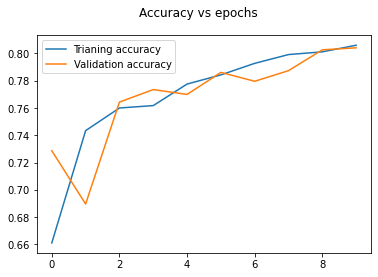

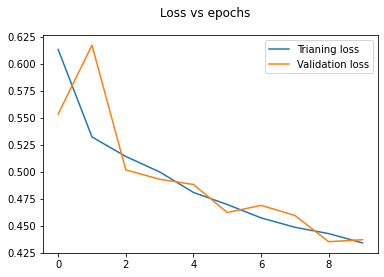

In [166]:
plot_acc(vanilla_200_history)
plot_loss(vanilla_200_history)

In [158]:
vanilla_200_test_loss, vanilla_200_test_acc = vanilla_200_model.evaluate(X_test, Y_test)
print('Test accur8y: {:.2f}%'.format(vanilla_200_test_acc*100))

782/782 [==============================] - 11s 14ms/step - loss: 0.4371 - accuracy: 0.8042
Test accur8y: 80.42%


## Vanilla RNN 500

In [142]:
vanilla_500_model = vanilla_rnn(500)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 200, 100)          8858300   
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 200, 500)          300500    
_________________________________________________________________
global_average_pooling1d_29  (None, 500)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 501       
Total params: 9,159,301
Trainable params: 301,001
Non-trainable params: 8,858,300
_________________________________________________________________


In [143]:
vanilla_500_history = vanilla_500_model.fit(X_train, Y_train, epochs=10, validation_data =(X_test, Y_test), batch_size=100)

Epoch 1/10
250/250 [==============================] - 94s 376ms/step - loss: 0.6147 - accuracy: 0.6708 - val_loss: 0.5644 - val_accuracy: 0.7222
Epoch 2/10
250/250 [==============================] - 99s 395ms/step - loss: 0.5444 - accuracy: 0.7419 - val_loss: 0.5390 - val_accuracy: 0.7332
Epoch 3/10
250/250 [==============================] - 102s 406ms/step - loss: 0.5120 - accuracy: 0.7572 - val_loss: 0.4994 - val_accuracy: 0.7656
Epoch 4/10
250/250 [==============================] - 100s 399ms/step - loss: 0.4946 - accuracy: 0.7700 - val_loss: 0.4694 - val_accuracy: 0.7852
Epoch 5/10
250/250 [==============================] - 101s 402ms/step - loss: 0.4774 - accuracy: 0.7772 - val_loss: 0.4775 - val_accuracy: 0.7782
Epoch 6/10
250/250 [==============================] - 101s 402ms/step - loss: 0.4850 - accuracy: 0.7790 - val_loss: 0.4734 - val_accuracy: 0.7879
Epoch 7/10
250/250 [==============================] - 100s 402ms/step - loss: 0.4629 - accuracy: 0.7895 - val_loss: 0.4419 - v

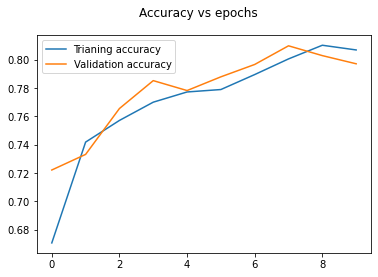

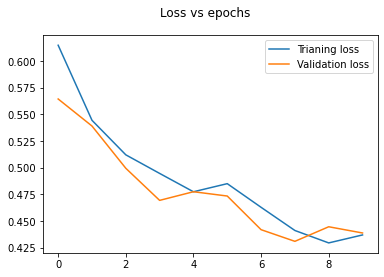

In [168]:
plot_acc(vanilla_500_history)
plot_loss(vanilla_500_history)

In [145]:
vanilla_500_test_loss, vanilla_500_test_acc = vanilla_500_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(vanilla_500_test_acc*100))

782/782 [==============================] - 40s 52ms/step - loss: 0.4388 - accuracy: 0.7971
Test accuracy: 79.71%


# Models - LSTM
##### With hidden state dimensions 20, 50, 100, 200, 500

## LSTM 20

In [54]:
lstm_20_model = lstm_model(20)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 100)          8858300   
_________________________________________________________________
lstm_5 (LSTM)                (None, 200, 20)           9680      
_________________________________________________________________
global_average_pooling1d_10  (None, 20)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 8,868,001
Trainable params: 9,701
Non-trainable params: 8,858,300
_________________________________________________________________


In [55]:
lstm_20_history = lstm_20_model.fit(X_train, Y_train, epochs=5, validation_data = (X_test, Y_test))

Epoch 1/5
782/782 [==============================] - 34s 44ms/step - loss: 0.5393 - accuracy: 0.7282 - val_loss: 0.4483 - val_accuracy: 0.8062
Epoch 2/5
782/782 [==============================] - 35s 45ms/step - loss: 0.4260 - accuracy: 0.8118 - val_loss: 0.3977 - val_accuracy: 0.8289
Epoch 3/5
782/782 [==============================] - 35s 45ms/step - loss: 0.3856 - accuracy: 0.8324 - val_loss: 0.3664 - val_accuracy: 0.8437
Epoch 4/5
782/782 [==============================] - 35s 45ms/step - loss: 0.3611 - accuracy: 0.8447 - val_loss: 0.3512 - val_accuracy: 0.8514
Epoch 5/5
782/782 [==============================] - 35s 45ms/step - loss: 0.3442 - accuracy: 0.8550 - val_loss: 0.3370 - val_accuracy: 0.8585


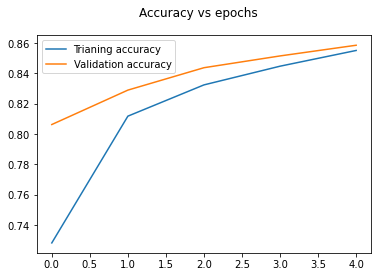

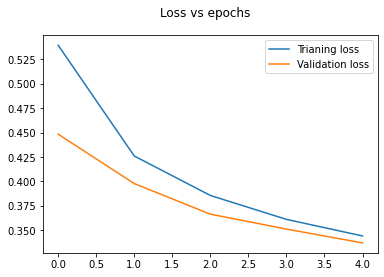

In [120]:
plot_acc(lstm_20_history)
plot_loss(lstm_20_history)

In [57]:
lstm_20_test_loss, lstm_20_test_acc = lstm_20_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(lstm_20_test_acc*100))

782/782 [==============================] - 6s 8ms/step - loss: 0.3370 - accuracy: 0.8585
Test accuracy: 85.85%


## LSTM 50

In [37]:
lstm_50_model = lstm_model(50)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          8858300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 50)           30200     
_________________________________________________________________
global_average_pooling1d_6 ( (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 8,888,551
Trainable params: 30,251
Non-trainable params: 8,858,300
_________________________________________________________________


In [38]:
lstm_50_history = lstm_50_model.fit(X_train, Y_train, epochs=5, validation_data = (X_test, Y_test))

Epoch 1/5
782/782 [==============================] - 39s 51ms/step - loss: 0.5069 - accuracy: 0.7548 - val_loss: 0.4233 - val_accuracy: 0.8114
Epoch 2/5
782/782 [==============================] - 39s 50ms/step - loss: 0.3895 - accuracy: 0.8328 - val_loss: 0.3535 - val_accuracy: 0.8486
Epoch 3/5
782/782 [==============================] - 39s 50ms/step - loss: 0.3528 - accuracy: 0.8510 - val_loss: 0.3445 - val_accuracy: 0.8492
Epoch 4/5
782/782 [==============================] - 39s 50ms/step - loss: 0.3283 - accuracy: 0.8627 - val_loss: 0.3227 - val_accuracy: 0.8671
Epoch 5/5
782/782 [==============================] - 39s 50ms/step - loss: 0.3100 - accuracy: 0.8730 - val_loss: 0.3084 - val_accuracy: 0.8733


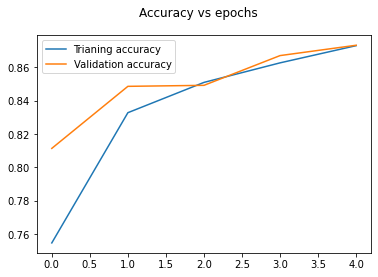

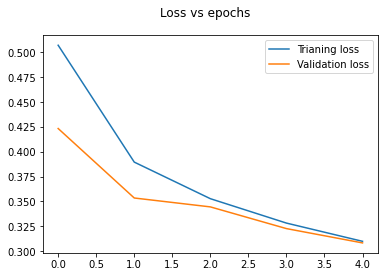

In [115]:
plot_acc(lstm_50_history)
plot_loss(lstm_50_history)

In [40]:
lstm_50_test_loss, lstm_50_test_acc = lstm_50_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(lstm_50_test_acc*100))

782/782 [==============================] - 8s 10ms/step - loss: 0.3084 - accuracy: 0.8733
Test accuracy: 87.33%


## LSTM 100

In [62]:
lstm_100_model = lstm_model(100)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 200, 100)          8858300   
_________________________________________________________________
lstm_7 (LSTM)                (None, 200, 100)          80400     
_________________________________________________________________
global_average_pooling1d_12  (None, 100)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 8,938,801
Trainable params: 80,501
Non-trainable params: 8,858,300
_________________________________________________________________


In [63]:
lstm_100_history = lstm_100_model.fit(X_train, Y_train, epochs=5, validation_data = (X_test, Y_test))

Epoch 1/5
782/782 [==============================] - 63s 80ms/step - loss: 0.4948 - accuracy: 0.7643 - val_loss: 0.3955 - val_accuracy: 0.8251
Epoch 2/5
782/782 [==============================] - 59s 75ms/step - loss: 0.3712 - accuracy: 0.8405 - val_loss: 0.3415 - val_accuracy: 0.8550
Epoch 3/5
782/782 [==============================] - 59s 75ms/step - loss: 0.3402 - accuracy: 0.8562 - val_loss: 0.3345 - val_accuracy: 0.8579
Epoch 4/5
782/782 [==============================] - 59s 75ms/step - loss: 0.3193 - accuracy: 0.8683 - val_loss: 0.3230 - val_accuracy: 0.8624
Epoch 5/5
782/782 [==============================] - 59s 76ms/step - loss: 0.3016 - accuracy: 0.8743 - val_loss: 0.3007 - val_accuracy: 0.8743


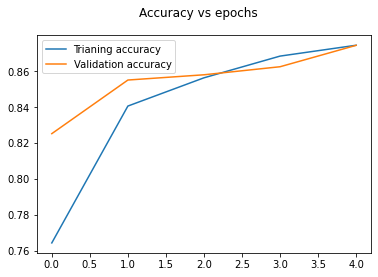

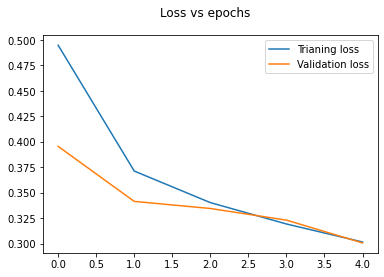

In [117]:
plot_acc(lstm_100_history)
plot_loss(lstm_100_history)

In [65]:
lstm_100_test_loss, lstm_100_test_acc = lstm_100_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(lstm_100_test_acc*100))

782/782 [==============================] - 14s 18ms/step - loss: 0.3007 - accuracy: 0.8743
Test accuracy: 87.43%


## LSTM 200

In [78]:
lstm_200_model = lstm_model(200)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 200, 100)          8858300   
_________________________________________________________________
lstm_11 (LSTM)               (None, 200, 200)          240800    
_________________________________________________________________
global_average_pooling1d_16  (None, 200)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 201       
Total params: 9,099,301
Trainable params: 241,001
Non-trainable params: 8,858,300
_________________________________________________________________


In [79]:
lstm_200_history = lstm_200_model.fit(X_train, Y_train, epochs=4, validation_data = (X_test, Y_test))

Epoch 1/4
782/782 [==============================] - 122s 156ms/step - loss: 0.4856 - accuracy: 0.7694 - val_loss: 0.4006 - val_accuracy: 0.8322
Epoch 2/4
782/782 [==============================] - 126s 161ms/step - loss: 0.3694 - accuracy: 0.8417 - val_loss: 0.3370 - val_accuracy: 0.8580
Epoch 3/4
782/782 [==============================] - 126s 161ms/step - loss: 0.3357 - accuracy: 0.8601 - val_loss: 0.3184 - val_accuracy: 0.8663
Epoch 4/4
782/782 [==============================] - 127s 163ms/step - loss: 0.3073 - accuracy: 0.8739 - val_loss: 0.3056 - val_accuracy: 0.8694


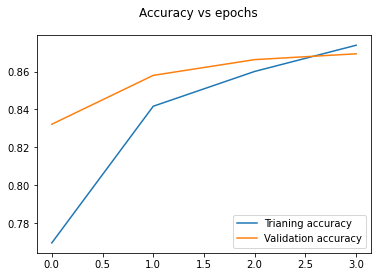

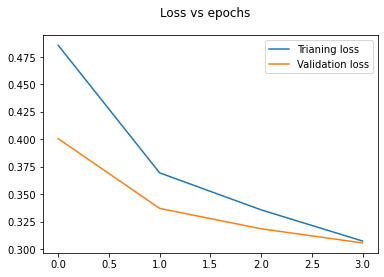

In [122]:
plot_acc(lstm_200_history)
plot_loss(lstm_200_history)

In [81]:
lstm_200_test_loss, lstm_200_test_acc = lstm_200_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(lstm_200_test_acc*100))

782/782 [==============================] - 36s 46ms/step - loss: 0.3056 - accuracy: 0.8694
Test accuracy: 86.94%


## LSTM 500

In [70]:
lstm_500_model = lstm_model(500)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 100)          8858300   
_________________________________________________________________
lstm_9 (LSTM)                (None, 200, 500)          1202000   
_________________________________________________________________
global_average_pooling1d_14  (None, 500)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 501       
Total params: 10,060,801
Trainable params: 1,202,501
Non-trainable params: 8,858,300
_________________________________________________________________


In [71]:
lstm_500_history = lstm_500_model.fit(X_train, Y_train, epochs=4, validation_data = (X_test, Y_test))

Epoch 1/4
782/782 [==============================] - 514s 658ms/step - loss: 0.5123 - accuracy: 0.7536 - val_loss: 0.4032 - val_accuracy: 0.8180
Epoch 2/4
782/782 [==============================] - 516s 660ms/step - loss: 0.3718 - accuracy: 0.8410 - val_loss: 0.3506 - val_accuracy: 0.8502
Epoch 3/4
782/782 [==============================] - 515s 658ms/step - loss: 0.3382 - accuracy: 0.8572 - val_loss: 0.3376 - val_accuracy: 0.8544
Epoch 4/4
782/782 [==============================] - 516s 659ms/step - loss: 0.3085 - accuracy: 0.8730 - val_loss: 0.3085 - val_accuracy: 0.8719


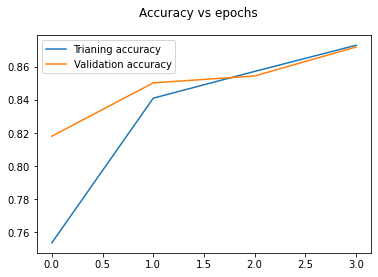

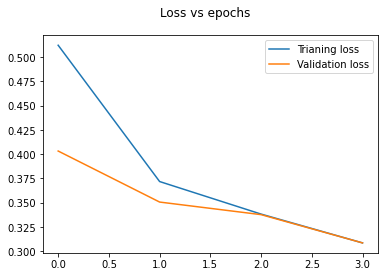

In [124]:
plot_acc(lstm_500_history)
plot_loss(lstm_500_history)

In [73]:
lstm_500_test_loss, lstm_500_test_acc = lstm_500_model.evaluate(X_test, Y_test)
print('Test accuracy: {:.2f}%'.format(lstm_500_test_acc*100))

782/782 [==============================] - 102s 131ms/step - loss: 0.3085 - accuracy: 0.8719
Test accuracy: 87.19%
